In [1]:
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import re
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [2]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

base_path  = './data/'

categories = {
    0: 'battery', 1: 'clothes', 2: 'glass', 3: 'metal', 
    4: 'organic', 5: 'paper', 6: 'plastic', 7: 'shoes'
}

In [3]:
filenames_list = []
# List to store the corresponding category; note that each folder of the dataset has one class of data
categories_list = []
category_names_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    category_name = categories[category]
    # filenames = category_name + '/' + os.listdir(base_path + category_name)
    print(filenames)

    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)
    category_names_list = category_names_list + [category_name] * len(filenames)

['battery1.jpg', 'battery10.jpg', 'battery100.jpg', 'battery101.jpg', 'battery102.jpg', 'battery103.jpg', 'battery104.jpg', 'battery105.jpg', 'battery106.jpg', 'battery107.jpg', 'battery108.jpg', 'battery109.jpg', 'battery11.jpg', 'battery110.jpg', 'battery111.jpg', 'battery112.jpg', 'battery113.jpg', 'battery114.jpg', 'battery115.jpg', 'battery116.jpg', 'battery117.jpg', 'battery118.jpg', 'battery119.jpg', 'battery12.jpg', 'battery120.jpg', 'battery121.jpg', 'battery122.jpg', 'battery123.jpg', 'battery124.jpg', 'battery125.jpg', 'battery126.jpg', 'battery127.jpg', 'battery128.jpg', 'battery129.jpg', 'battery13.jpg', 'battery130.jpg', 'battery131.jpg', 'battery132.jpg', 'battery133.jpg', 'battery134.jpg', 'battery135.jpg', 'battery136.jpg', 'battery137.jpg', 'battery138.jpg', 'battery139.jpg', 'battery14.jpg', 'battery140.jpg', 'battery141.jpg', 'battery142.jpg', 'battery143.jpg', 'battery144.jpg', 'battery145.jpg', 'battery146.jpg', 'battery147.jpg', 'battery148.jpg', 'battery149.jpg'

In [4]:
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list,
    'category_name': category_names_list
})
df

,filename,category,category_name
0,battery1.jpg,0,battery
1,battery10.jpg,0,battery
2,battery100.jpg,0,battery
3,battery101.jpg,0,battery
4,battery102.jpg,0,battery
...,...,...,...
45296,shoes995.jpg,7,shoes
45297,shoes996.jpg,7,shoes
45298,shoes997.jpg,7,shoes
45299,shoes998.jpg,7,shoes


In [5]:
df.head()

,filename,category,category_name
0,battery1.jpg,0,battery
1,battery10.jpg,0,battery
2,battery100.jpg,0,battery
3,battery101.jpg,0,battery
4,battery102.jpg,0,battery


In [6]:
# Add class name prefix to filename, so "/paper104.jpg" becomes "paper/paper104.jpg"
def add_class_name_prefix(df, col_name):
    df[col_name] =  df['category_name']  + '/' + df[col_name]
    return df

df = add_class_name_prefix(df, 'filename')
df

,filename,category,category_name
0,battery/battery1.jpg,0,battery
1,battery/battery10.jpg,0,battery
2,battery/battery100.jpg,0,battery
3,battery/battery101.jpg,0,battery
4,battery/battery102.jpg,0,battery
...,...,...,...
45296,shoes/shoes995.jpg,7,shoes
45297,shoes/shoes996.jpg,7,shoes
45298,shoes/shoes997.jpg,7,shoes
45299,shoes/shoes998.jpg,7,shoes


In [7]:
# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('Number of elements =', len(df))

Number of elements = 45301


In [8]:
df.head()

,filename,category,category_name
0,organic/organic_012174_photo.jpg,4,organic
1,organic/organic_005776_photo.jpg,4,organic
2,organic/organic_000594_photo.jpg,4,organic
3,organic/organic_012313_photo.jpg,4,organic
4,clothes/clothes1700.jpg,1,clothes


organic/O_12482.jpg


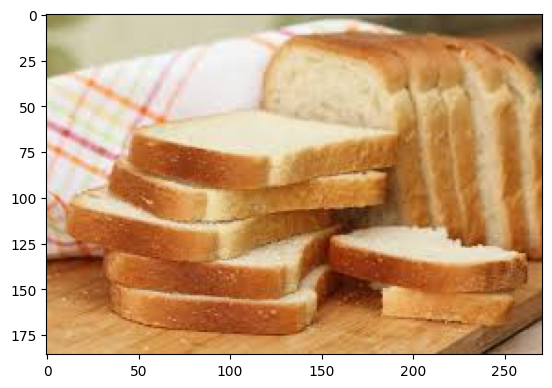

In [9]:
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = image.load_img(base_path +sample['filename'])
print(sample['filename'])
plt.imshow(randomimage)

In [10]:
df.to_csv('./data/waste_classification_base.csv', index=False)

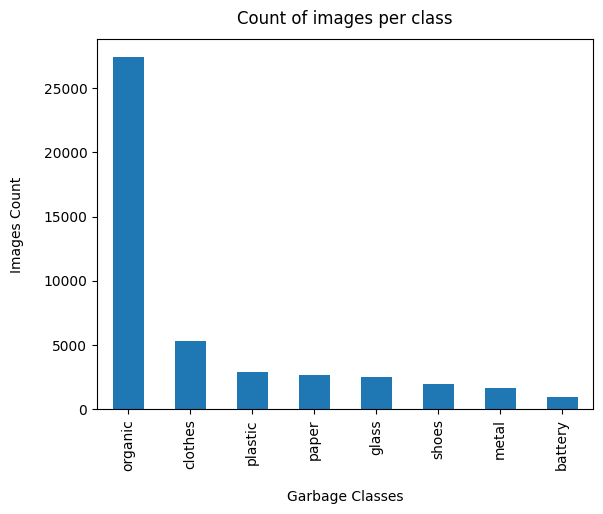

In [13]:
df_visualization = df.copy()
# Change the categories from numbers to names
df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02)
plt.savefig('./output/Count of images per class.png')
plt.show()

In [14]:
df_visualization['category'].value_counts()

category
organic    27430
clothes     5325
plastic     2859
paper       2632
glass       2479
shoes       1977
metal       1654
battery      945
Name: count, dtype: int64

In [15]:
df_organic = df.loc[df['category_name'] == 'organic']
df_organic.reset_index()

print('Number of elements =', len(df_organic))
df_organic

Number of elements = 27430


,filename,category,category_name
0,organic/organic_012174_photo.jpg,4,organic
1,organic/organic_005776_photo.jpg,4,organic
2,organic/organic_000594_photo.jpg,4,organic
3,organic/organic_012313_photo.jpg,4,organic
6,organic/organic_002789_photo.jpg,4,organic
...,...,...,...
45294,organic/organic_009034_photo.jpg,4,organic
45295,organic/O_8005.jpg,4,organic
45296,organic/organic_003371_photo.jpg,4,organic
45298,organic/organic_003098_photo.jpg,4,organic


In [16]:
df_other = df.loc[df['category_name'] != 'organic']
df_other.reset_index()

print('Number of elements =', len(df_other))
df_other

Number of elements = 17871


,filename,category,category_name
4,clothes/clothes1700.jpg,1,clothes
5,clothes/clothes2279.jpg,1,clothes
7,plastic/R_3307.jpg,6,plastic
8,plastic/plastic294.jpg,6,plastic
10,metal/metal49.jpg,3,metal
...,...,...,...
45288,clothes/clothes2211.jpg,1,clothes
45289,clothes/clothes3842.jpg,1,clothes
45293,metal/R_2505.jpg,3,metal
45297,paper/R_2407.jpg,5,paper


In [17]:
df_organic_sampled = df_organic.sample(n=6000)
print('Number of elements =', len(df_organic_sampled))
df_organic_sampled

Number of elements = 6000


,filename,category,category_name
38041,organic/organic_000703_photo.jpg,4,organic
3345,organic/O_7976.jpg,4,organic
26097,organic/O_443.jpg,4,organic
42190,organic/organic_007369_photo.jpg,4,organic
27313,organic/O_2073.jpg,4,organic
...,...,...,...
9088,organic/O_2112.jpg,4,organic
25233,organic/O_10353.jpg,4,organic
23347,organic/organic_012454_photo.jpg,4,organic
2145,organic/O_3906.jpg,4,organic


In [18]:
df_sampled_merged=pd.concat([df_other,df_organic_sampled])
print('Number of elements =', len(df_sampled_merged))
print('Number of elements =', len(df_other) + len(df_organic_sampled))
df_sampled_merged

Number of elements = 23871
Number of elements = 23871


,filename,category,category_name
4,clothes/clothes1700.jpg,1,clothes
5,clothes/clothes2279.jpg,1,clothes
7,plastic/R_3307.jpg,6,plastic
8,plastic/plastic294.jpg,6,plastic
10,metal/metal49.jpg,3,metal
...,...,...,...
9088,organic/O_2112.jpg,4,organic
25233,organic/O_10353.jpg,4,organic
23347,organic/organic_012454_photo.jpg,4,organic
2145,organic/O_3906.jpg,4,organic


In [19]:
# Shuffle the dataframe
df_sampled_merged = df_sampled_merged.sample(frac=1).reset_index(drop=True)

print('Number of elements =', len(df_sampled_merged))

Number of elements = 23871


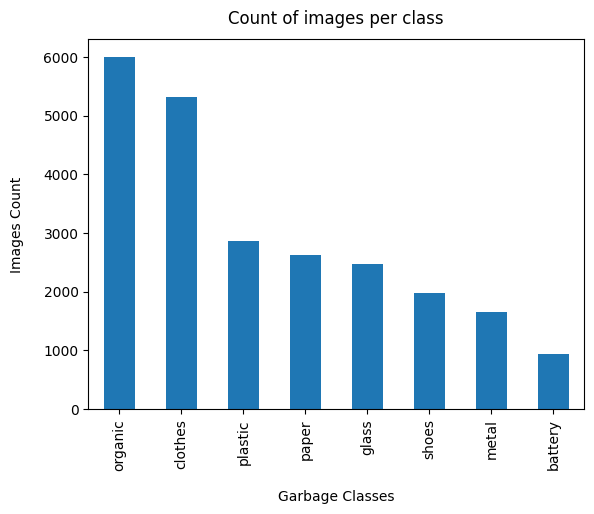

In [20]:
df_visualization = df_sampled_merged.copy()
# Change the categories from numbers to names
df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02)
plt.savefig('./output/Count of images per class after.png')
plt.show()

In [21]:
df_sampled_merged.to_csv('./data/waste_classification.csv', index=False)

In [44]:
# Change the categories from numbers to names
# df["category"] = df["category"].replace(categories)

# Split the data into train, validation, and test sets
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('Train size =', total_train, 'Validate size =', total_validate, 'Test size =', test_df.shape[0])

Train size = 36241 Validate size = 4530 Test size = 4531
